A temperatura de maior eficiência é: 6928 K


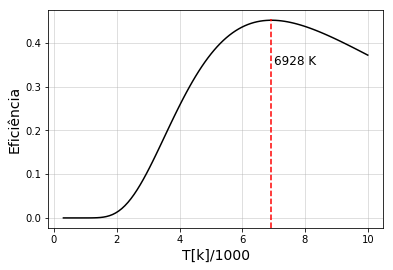

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from gaussxw import gaussxwab

def f(x):
    return x**3/(np.exp(x) - 1)

############################################################
#--Esse código calcula a eficiência (percentual da---------#
#--intensidade emitida na faixa do vísivel) para uma-------#
#--lâmpada (aproximada para um corpo negro). A eficiência--#
#--é calculada para uma temperatura T do corpo.------------#
############################################################

def Eff(T):
    # k: Constante de Boltzmann
    # c: Velocidade da luz
    # h: Constante de Planck
    # lamb_i: Limites da faixa de radiação vísivel
    
    k      = 1.38064852e-23  # [m^2 kg s^-2 k^-1]
    c      = 299792458       # [m/s]
    h      = 6.62607015e-34  # [m^2 kg/s]
    lamb_1 = 390e-9          # [m]
    lamb_2 = 750e-9          # [m]
    
    a = (h*c)/(k*T*lamb_2)
    b = (h*c)/(k*T*lamb_1)
    
    # Integração Gaussiana
    N     = 100
    xp,wp = gaussxwab(N, a, b)
    I = 0
    for k in range(N):
        I += wp[k]*f(xp[k])
        
    return 15*I/np.pi**4

T   = np.linspace(300, 10000, 100)
eff = np.array([Eff(T) for T in T])

#####################################################################
#--Tendo o perfil da eficiência pela temperatura podemos------------#
#--calcular a temperatura de maior eficiência pelo método-----------#
#--de busca da razão aurea. A função necessita do array-------------#
#--onde será feita a busca, pontos iníciais e uma acurácia limite.--#
#####################################################################
def gld_srch(f, p0, acc):
    x0, x3 = p0[0], p0[1]
    phi    = (1 + np.sqrt(5))/2
    d      = (x3 - x0)/phi
    
    x1 = x0 + d
    x2 = x3 - d
    
    while (x3 - x0) > acc:
        if f(x1) > f(x2):
            x0 = x2
            x2 = x1
            x1 = x0 + (x3 - x0)/phi
            
        else:
            x3 = x1
            x1 = x2
            x2 = x3 - (x3 - x0)/phi
    
    return (x3 + x0)/2

# A temperatura de máxima eficiência é calcula com precisão de 1K
Max_T = gld_srch(Eff, [6e3,8e3], 1)                
print("A temperatura de maior eficiência é: %d K" %Max_T)

plt.plot(T/1000, eff, '-k')
plt.grid(alpha = 0.5)
plt.xlabel('T[k]/1000', size = 14)
plt.ylabel('Eficiência', size = 14)
plt.axvline(x = Max_T/1000, linestyle = '--', color = 'r', ymax = 0.96)
plt.text(7, 0.35, "6928 K", fontsize = 12)
plt.show()